### 1. Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

Time for unordered generating =  0.00313568115234375
Time for ordered generating =  0.0029802322387695312
Difference =  0.00015544891357421875


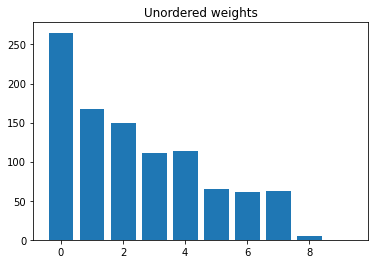

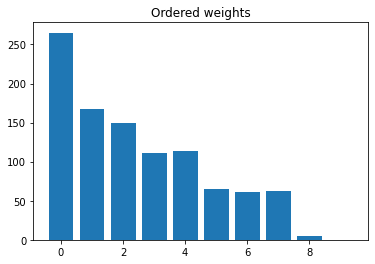

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import time

wt = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
wt /= wt.sum()
s = [wt[:i].sum() for i in range(1,11)]
ran = [np.random.rand() for i in range(1000)]
p = []

#unordered
start = time.time()
for i in range(1000):
    j = 0
    while j != -1:
        if ran[i] < s[j]:
            p.append(j)
            j =- 1
        else:
            j += 1
end = time.time()
time1 = end - start
print("Time for unordered generating = ", time1)

wt = np.sort(wt)[::-1]
s = [wt[:i].sum() for i in range(1,11)]
ran = [np.random.rand() for i in range(1000)]
p = []

#ordered
start = time.time()
for i in range(1000):
    j = 0
    while j !=- 1:
        if ran[i] < s[j]:
            p.append(j)
            j =- 1
        else:
            j += 1
end = time.time()
time2 = end-start
print("Time for ordered generating = ", time2)

delta = time1 - time2
print("Difference = ", delta)


plt.bar(np.arange(10), [p.count(i) for i in range(10)])
plt.title("Unordered weights")
plt.show()

plt.bar(np.argsort(wt)[::-1], [p.count(i) for i in range(10)])
plt.title("Ordered weights")
plt.show()

### 2. Смоделируйте выборку размера 1000 из распределения  Exp(λ) . Постройте выборочную гистограмму и точный график плотности распределения.

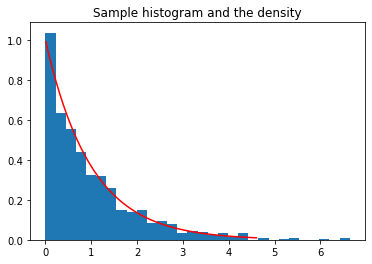

In [20]:
import math
from scipy.stats import expon

a = np.random.exponential(1, 1000)
x = np.linspace(expon.ppf(0.01), expon.ppf(0.99), 100)

plt.hist(a, bins = 30, density = True)
plt.plot(x, expon.pdf(x), c = 'r')
plt.title("Sample histogram and the density")
plt.show()

### 3. Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

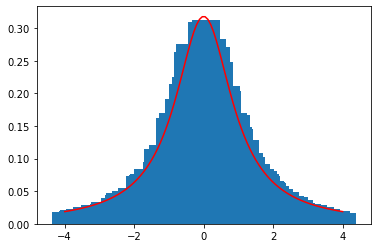

In [25]:
from scipy import stats
import math

#uniform distribution generator
rd = [8 * np.random.rand()-4 for i in range(1000)]
rd.sort()
#fufture cauchy distribution
ch = []

i = 0
while i != 1000: #making of each point
    s = 1 / math.pi * np.random.rand()
    if s < (1 / (math.pi * (1 + rd[i] * rd[i]))):
        ch.append(s)
        i += 1

plt.bar(rd, ch)
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.plot(x, dist.pdf(x), color = 'r')
plt.show()

### 4. Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

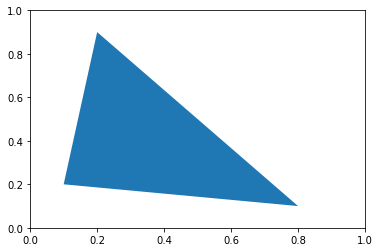

In [11]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

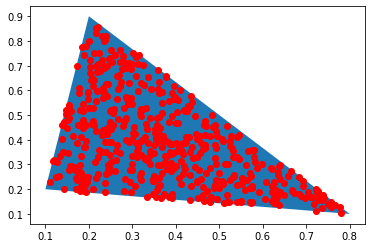

In [22]:
import math
import numpy as np
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

rd = np.random.rand(500)
x = np.array([(1 - math.sqrt(1 - rd[i])) for i in range(500)]) 
y = np.random.rand(500) * (1 - x)
#remake
new_x = 0.1 + 0.7 * x + 0.1 * y 
new_y = 0.2 - 0.1 * x + 0.7 * y 

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.scatter(new_x, new_y, c = 'r')
plt.show()


### 5. Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

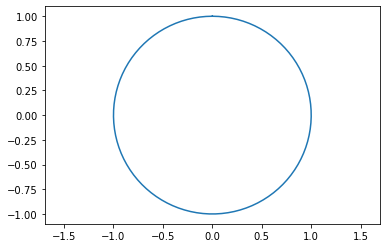

In [13]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

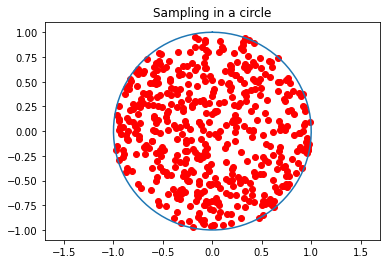

In [14]:
angle = 2 * np.pi * np.random.rand(1, 500)
radius = np.sqrt(np.random.rand(1, 500))
t = np.linspace(0, 2 * np.pi, 100)

x = radius * np.cos(angle)
y = radius * np.sin(angle)

plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.scatter(x, y, color='r')
plt.title("Sampling in a circle")
plt.show()

### 6. Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

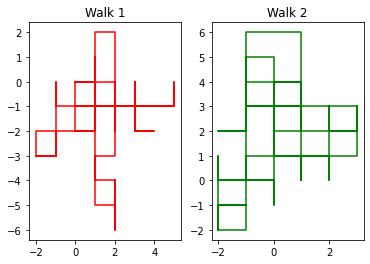

In [15]:
def walk(n):
    x_ind = np.random.choice(np.arange(n), n//2, replace = False)
    y_ind = np.random.choice(np.arange(n), n//2, replace = False)
    x_step = np.ones(n)
    x_step[x_ind] = -1
    y_step = np.ones(n)
    y_step[y_ind] = -1
    x_new = np.cumsum(x_step)
    y_new = np.cumsum(y_step)
    x = (x_new + y_new) / 2 
    y = (y_new - x_new) / 2
    return x,y

x, y = walk(100)
plt.subplot(1,2,1)
plt.plot(x,y, c = 'r')
plt.title("Walk 1")

x, y = walk(100)
plt.subplot(1,2,2)
plt.plot(x,y, c = 'g')
plt.title("Walk 2")
plt.show()

### 7. Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

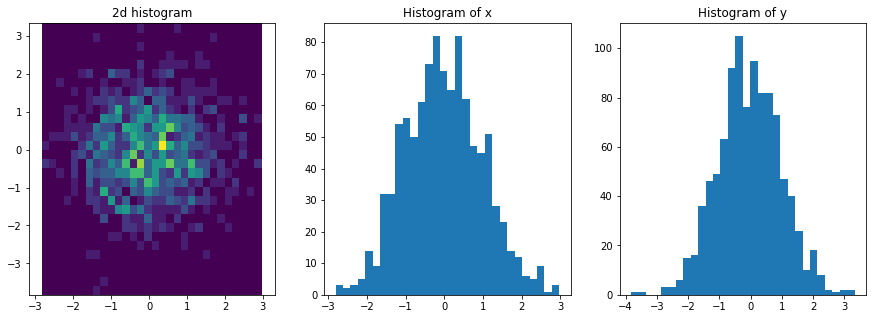

In [16]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

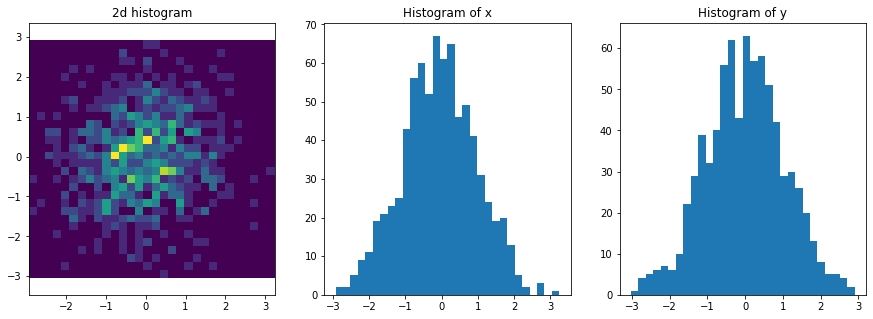

In [23]:
n = 1000
cos = np.array([])
sin = np.array([])
a = np.arange(n)

for i in a:
    p, q = 2 * np.random.rand(2) - 1 
    trig = p**2 + q**2 
    if 0 < trig <=1:
        cos = np.append(cos, p)
        sin = np.append(sin, q)

trig = cos**2 + sin**2
rad = np.sqrt(-2 * np.log(trig)/trig)
x = rad * cos
y = rad * sin

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

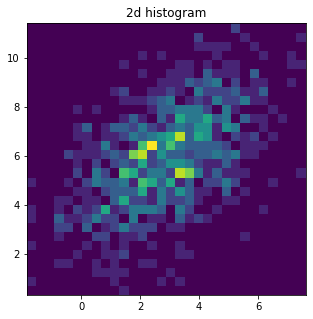

In [24]:
#cholesky decomposition
a = np.transpose(np.linalg.cholesky([[2, 1], [1, 4]])) 
x_new, y_new = np.matmul(a, [x,y]) + np.reshape(np.array([3,6]),(2,1))
plt.figure(figsize=(5,5))
plt.hist2d(x_new, y_new, bins=30)
plt.title("2d histogram")
plt.show()